# Библиотеки и функции для создания датасета

In [1]:
import pandas as pd
import re

In [2]:
def get_dummy_summary(text: str, len_summary: str) -> str:
    words = re.findall(r'\b\w+\b', text)
    compression = int(len(words) / get_compression(len_summary)) + 1
    dummy_summary = words[::compression]
    return ' '.join(dummy_summary)


def get_compression(len_summary: str) -> int:
    a = {
        "Короткое": 25,
        "Среднее": 50,
        "Длинное": 120
    }
    return a[len_summary]


def get_text_len(text: str):
    words = re.findall(r'\b\w+\b', text)
    return len(words)


def get_wrong_summary(example: str, len_summary: str) -> str:
    a = {
        "Короткое": 1,
        "Среднее": 3,
        "Длинное": 7
    }
    n = a[len_summary]
    return ' '.join([example] * n)

# Создание датасета

In [3]:
one_for_everyone = "На встрече обсудили планы на ближайшее время. Было решено сделать выводы и принять меры. Был выбран срок исполнения задач."
one_for_everyone

'На встрече обсудили планы на ближайшее время. Было решено сделать выводы и принять меры. Был выбран срок исполнения задач.'

In [4]:
df = pd.read_excel("files/dataset.xlsx")

In [5]:
df["Количество слов в диалоге"] = df["Диалог"].apply(lambda x: get_text_len(x))
df["Количество слов в саммари"] = df["Саммари"].apply(lambda x: get_text_len(x))

df_dialogs = df[['Диалог', 'Количество слов в диалоге', 'Длина диалога', 'Длина саммари']]
df_dialogs = df_dialogs.drop_duplicates().reset_index(drop=True)

In [6]:
one_for_everyone = "На встрече обсудили планы на ближайшее время. Было решено сделать выводы и принять меры. Был выбран срок исполнения задач."
one_for_everyone

'На встрече обсудили планы на ближайшее время. Было решено сделать выводы и принять меры. Был выбран срок исполнения задач.'

In [7]:
df_dialogs["dummy_summary"] = df.apply(lambda x: get_dummy_summary(x["Диалог"], x["Длина саммари"]), axis=1)
df_dialogs["wrong_summary"] = df_dialogs["Длина саммари"].apply(lambda x: get_wrong_summary(one_for_everyone, x))
df_dialogs.head()

Диалог  \
0  Участники: Вадим (руководитель отдела), Анаста...   
1  Участники: Вадим (руководитель отдела), Анаста...   
2  Участники: Вадим (руководитель отдела), Анаста...   
3  Участники: Дмитрий (CEO), Марина (главный бухг...   
4  Участники: Дмитрий (CEO), Марина (главный бухг...   

   Количество слов в диалоге Длина диалога Длина саммари  \
0                        129      Короткий      Короткое   
1                        129      Короткий       Среднее   
2                        129      Короткий       Длинное   
3                        117      Короткий      Короткое   
4                        117      Короткий       Среднее   

                                       dummy_summary  \
0  Участники Сергей быстро Анастасия Анастасия ос...   
1  Участники отдела Сергей Доброе быстро по Анаст...   
2  Участники руководитель Анастасия Сергей Вадим ...   
3  Участники Сергей быстро Анастасия Анастасия ос...   
4  Участники отдела Сергей Доброе быстро по Анаст...   

                                       wrong_summary  
0  На встрече обсудили планы на ближайшее время. ...  
1  На встрече обсудили планы на ближайшее время. ...  
2  На встрече обсудили планы на ближайшее время. ...  
3  На встрече обсудили планы на ближайшее время. ...  
4  На встрече обсудили планы на ближайшее время. ...

In [8]:
df_1 = df_dialogs[['Диалог', 'Длина диалога', 'Длина саммари', 'dummy_summary', 'wrong_summary']]
df_1 = pd.melt(df_dialogs,
               id_vars=['Диалог', 'Длина диалога', 'Длина саммари'],
               value_vars=['dummy_summary', 'wrong_summary'])

df_1.columns = ['Диалог', 'Длина диалога', 'Длина саммари', 'Источник саммари', 'Саммари']
df_1["Качество саммари"] = "Плохое"
df_1.head()

Диалог Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
3  Участники: Дмитрий (CEO), Марина (главный бухг...      Короткий   
4  Участники: Дмитрий (CEO), Марина (главный бухг...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   
3      Короткое    dummy_summary   
4       Среднее    dummy_summary   

                                             Саммари Качество саммари  
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое  
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое  
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое  
3  Участники Сергей быстро Анастасия Анастасия ос...           Плохое  
4  Участники отдела Сергей Доброе быстро по Анаст...           Плохое

In [13]:
df_chatgpt = df[['Диалог', 'Длина диалога', 'Длина саммари', 'Источник саммари', 'Саммари', 'Качество саммари']]
df_chatgpt.head()

Диалог Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
3  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
4  Участники: Вадим (руководитель отдела), Анаста...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое          ChatGPT   
1       Среднее          ChatGPT   
2       Длинное          ChatGPT   
3      Короткое          ChatGPT   
4       Среднее          ChatGPT   

                                             Саммари Качество саммари  
0  Вадим спрашивает статус нового проекта. Анаста...          Хорошее  
1  Вадим провёл короткую встречу по новому проект...          Хорошее  
2  На коротком совещании Вадим, руководитель прое...          Хорошее  
3  Вадим объявил, что проект закрывается. Анастас...           Плохое  
4  Вместо обсуждения документации Вадим решил рас...           Плохое

In [14]:
df_all = pd.concat([df_1, df_chatgpt]).reset_index(drop=True)
df_all.head()

Диалог Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
3  Участники: Дмитрий (CEO), Марина (главный бухг...      Короткий   
4  Участники: Дмитрий (CEO), Марина (главный бухг...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   
3      Короткое    dummy_summary   
4       Среднее    dummy_summary   

                                             Саммари Качество саммари  
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое  
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое  
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое  
3  Участники Сергей быстро Анастасия Анастасия ос...           Плохое  
4  Участники отдела Сергей Доброе быстро по Анаст...           Плохое

# get id of dialogue, добавление id к диалогам

In [15]:
df_dialog = df_all[["Диалог"]].drop_duplicates().reset_index(drop=True)
df_dialog["text_id"] = df_dialog.index + 1

df_all_with_id = pd.merge(df_all, df_dialog, how="inner", on="Диалог")

In [16]:
df_all_with_id.columns = ['text', 'Длина диалога', 'Длина саммари', 'Источник саммари',
                          'summary', 'Качество саммари', 'text_id']

df_all_with_id.head()

text Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
3  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
4  Участники: Вадим (руководитель отдела), Анаста...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   
3      Короткое    wrong_summary   
4       Среднее    wrong_summary   

                                             summary Качество саммари  text_id  
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое        1  
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое        1  
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое        1  
3  На встрече обсудили планы на ближайшее время. ...           Плохое        1  
4  На встрече обсудили планы на ближайшее время. ...           Плохое        1

In [17]:
df_all_with_id["Количество слов в диалоге"] = df_all_with_id["text"].apply(lambda x: get_text_len(x))
df_all_with_id["Количество слов в саммари"] = df_all_with_id["summary"].apply(lambda x: get_text_len(x))
df_all_with_id["Сжатие"] = df_all_with_id["Количество слов в диалоге"]/df_all_with_id["Количество слов в саммари"]

df_all_with_id.head()

text Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
3  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
4  Участники: Вадим (руководитель отдела), Анаста...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   
3      Короткое    wrong_summary   
4       Среднее    wrong_summary   

                                             summary Качество саммари  \
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое   
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое   
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое   
3  На встрече обсудили планы на ближайшее время. ...           Плохое   
4  На встрече обсудили планы на ближайшее время. ...           Плохое   

   text_id  Количество слов в диалоге  Количество слов в саммари    Сжатие  
0        1                        129                         22  5.863636  
1        1                        129                         43  3.000000  
2        1                        129                         65  1.984615  
3        1                        129                         19  6.789474  
4        1                        129                         57  2.263158

In [18]:
df_all_with_id.columns

Index(['text', 'Длина диалога', 'Длина саммари', 'Источник саммари', 'summary',
       'Качество саммари', 'text_id', 'Количество слов в диалоге',
       'Количество слов в саммари', 'Сжатие'],
      dtype='object')

# Расчет метрик

## 1. BERT with `bert-base-multilingual-cased`

In [19]:
from bert_score import score

def calculate_bert_scores(df, model_name="bert-base-multilingual-cased"):
    """
    Вычисляет BERT-score для каждой строки DataFrame.
    :param df: DataFrame с колонками "text" (оригинал текста) и "summary" (саммари).
    :param model_name: Название модели для расчета BERT-score.
    :return: DataFrame с добавленными колонками P, R, F1.
    """
    # Проверим, что нужные колонки есть в DataFrame
    if not {"text", "summary"}.issubset(df.columns):
        raise ValueError("DataFrame должен содержать колонки 'text' и 'summary'.")

    # Вычисляем BERT-score
    precision, recall, f1 = score(
        cands=df["summary"].tolist(),  # Список саммари
        refs=df["text"].tolist(),      # Список оригинальных текстов
        model_type=model_name,        # Модель для расчета
        lang="ru",                    # Указание языка (русский)
        verbose=True                  # Отображение прогресса
    )

    # Добавляем метрики в DataFrame
    df[f"P_{model_name}"] = precision.tolist()
    df[f"R_{model_name}"] = recall.tolist()
    df[f"F1_{model_name}"] = f1.tolist()

    return df

In [20]:
df_with_scores = calculate_bert_scores(df_all_with_id)
df_with_scores.head(3)

calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/4 [00:00<?, ?it/s]

done in 82.04 seconds, 2.93 sentences/sec


text Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   

                                             summary Качество саммари  \
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое   
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое   
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое   

   text_id  Количество слов в диалоге  Количество слов в саммари    Сжатие  \
0        1                        129                         22  5.863636   
1        1                        129                         43  3.000000   
2        1                        129                         65  1.984615   

   P_bert-base-multilingual-cased  R_bert-base-multilingual-cased  \
0                        0.721302                        0.585546   
1                        0.742455                        0.632504   
2                        0.764944                        0.675839   

   F1_bert-base-multilingual-cased  
0                         0.646373  
1                         0.683083  
2                         0.717637

## 2. BERT with `XLM-RoBERTa`

In [21]:
from bert_score.utils import model2layers
"xlm-roberta-large" in model2layers

True

XLM-RoBERTa — это мультиязычная версия модели RoBERTa, обученная на 100 языках. Она доступна в двух вариантах: `xlm-roberta-base` и `xlm-roberta-large`:

- `xlm-roberta-large` - больше по числу параметров, глубине и сложности, что позволяет лучше улавливать сложные зависимости в текстах; даёт лучшие результаты, но требует больше вычислительных ресурсов.

In [22]:
df_with_scores = calculate_bert_scores(df_with_scores, model_name="xlm-roberta-large")
df_with_scores.head(3)

calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/4 [00:00<?, ?it/s]

done in 237.15 seconds, 1.01 sentences/sec


text Длина диалога  \
0  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
1  Участники: Вадим (руководитель отдела), Анаста...      Короткий   
2  Участники: Вадим (руководитель отдела), Анаста...      Короткий   

  Длина саммари Источник саммари  \
0      Короткое    dummy_summary   
1       Среднее    dummy_summary   
2       Длинное    dummy_summary   

                                             summary Качество саммари  \
0  Участники Сергей быстро Анастасия Анастасия ос...           Плохое   
1  Участники отдела Сергей Доброе быстро по Анаст...           Плохое   
2  Участники руководитель Анастасия Сергей Вадим ...           Плохое   

   text_id  Количество слов в диалоге  Количество слов в саммари    Сжатие  \
0        1                        129                         22  5.863636   
1        1                        129                         43  3.000000   
2        1                        129                         65  1.984615   

   P_bert-base-multilingual-cased  R_bert-base-multilingual-cased  \
0                        0.721302                        0.585546   
1                        0.742455                        0.632504   
2                        0.764944                        0.675839   

   F1_bert-base-multilingual-cased  P_xlm-roberta-large  R_xlm-roberta-large  \
0                         0.646373             0.854496             0.799782   
1                         0.683083             0.853577             0.814546   
2                         0.717637             0.858240             0.831172   

   F1_xlm-roberta-large  
0              0.826234  
1              0.833605  
2              0.844489

## 3. BLEU

In [23]:
from sacrebleu import sentence_bleu

# Функция для расчета BLEU
def calculate_bleu(summary, reference):
    """
    Вычисляет BLEU для пары summary и reference.
    """
    if not summary or not reference:  # Проверка на пустые значения
        return 0.0
    return sentence_bleu(summary, [reference]).score

# Добавление столбца BLEU в существующий DataFrame
df_with_scores['BLEU'] = df_with_scores.apply(lambda row: calculate_bleu(row['summary'], row['text']), axis=1)
df_with_scores[['text', 'summary', 'BLEU']].head(3)

text  \
0  Участники: Вадим (руководитель отдела), Анаста...   
1  Участники: Вадим (руководитель отдела), Анаста...   
2  Участники: Вадим (руководитель отдела), Анаста...   

                                             summary      BLEU  
0  Участники Сергей быстро Анастасия Анастасия ос...  0.004091  
1  Участники отдела Сергей Доброе быстро по Анаст...  0.108655  
2  Участники руководитель Анастасия Сергей Вадим ...  0.304833

## 4. ROUGE

In [24]:
from rouge_score import rouge_scorer

# Функция для расчета ROUGE
def calculate_rouge(summary, reference):
    """
    Рассчитать ROUGE-1, ROUGE-2, ROUGE-L для пары summary и reference.
    """
    if not summary or not reference:  # Проверка на пустые значения
        return {"rouge-1": 0.0, "rouge-2": 0.0, "rouge-l": 0.0}
    
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, summary)
    
    # Возвращаем только F1-оценку для каждой метрики
    return {
        "rouge-1": scores['rouge1'].fmeasure,
        "rouge-2": scores['rouge2'].fmeasure,
        "rouge-l": scores['rougeL'].fmeasure
    }

# Применение к DataFrame
def add_rouge_metrics_to_df(df):
    """
    Добавить ROUGE-1, ROUGE-2, ROUGE-L в DataFrame.
    """
    rouge_results = df.apply(lambda row: calculate_rouge(row['summary'], row['text']), axis=1)
    df['ROUGE-1'] = rouge_results.apply(lambda x: x['rouge-1'])
    df['ROUGE-2'] = rouge_results.apply(lambda x: x['rouge-2'])
    df['ROUGE-L'] = rouge_results.apply(lambda x: x['rouge-l'])
    return df

# Добавляем метрики в DataFrame
df_with_scores = add_rouge_metrics_to_df(df_with_scores)

# Проверяем результаты
df_with_scores[['text', 'summary', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].head(3)

text  \
0  Участники: Вадим (руководитель отдела), Анаста...   
1  Участники: Вадим (руководитель отдела), Анаста...   
2  Участники: Вадим (руководитель отдела), Анаста...   

                                             summary  ROUGE-1  ROUGE-2  \
0  Участники Сергей быстро Анастасия Анастасия ос...      0.0      0.0   
1  Участники отдела Сергей Доброе быстро по Анаст...      0.0      0.0   
2  Участники руководитель Анастасия Сергей Вадим ...      0.0      0.0   

   ROUGE-L  
0      0.0  
1      0.0  
2      0.0

## 5. METEOR

In [25]:
import nltk
nltk.download('wordnet')  # Для работы METEOR с синонимами

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize  # Импортируем токенизатор

# Функция для расчета METEOR
def calculate_meteor(summary, reference):
    """
    Рассчитать METEOR для пары summary и reference.
    """
    if not summary or not reference:  # Проверка на пустые значения
        return 0.0
    # Токенизируем оба текста
    summary_tokens = word_tokenize(summary)
    reference_tokens = word_tokenize(reference)
    
    # Рассчитываем METEOR
    return meteor_score([reference_tokens], summary_tokens)

# Применение к DataFrame
def add_meteor_metric_to_df(df):
    """
    Добавить METEOR в DataFrame.
    """
    df['METEOR'] = df.apply(lambda row: calculate_meteor(row['summary'], row['text']), axis=1)
    return df

# Добавляем METEOR в DataFrame
df_with_scores = add_meteor_metric_to_df(df_with_scores)

# Проверяем результаты
df_with_scores[['text', 'summary', 'METEOR']].head(3)

text  \
0  Участники: Вадим (руководитель отдела), Анаста...   
1  Участники: Вадим (руководитель отдела), Анаста...   
2  Участники: Вадим (руководитель отдела), Анаста...   

                                             summary    METEOR  
0  Участники Сергей быстро Анастасия Анастасия ос...  0.070064  
1  Участники отдела Сергей Доброе быстро по Анаст...  0.135135  
2  Участники руководитель Анастасия Сергей Вадим ...  0.201488

## 6. Комбинация моделей

In [93]:
import math

def calculate_combine_score(bert_xlm_score, bert_base_score, bleu_score, meteor_score):
    
    normalized_bleu = (math.log(bleu_score + 1) / 2)
    
    s = 100+5+8+3
    
    # Веса для метрик
    weight_bert_xlm = 100/s
    weight_bert_base = 5/s
    weight_bleu = 8/s
    weight_meteor = 3/s
    
    # Расчет финального результата
    final_score = (
        weight_bert_xlm * bert_xlm_score +
        weight_bert_base * bert_base_score +
        weight_bleu * normalized_bleu +
        weight_meteor * meteor_score
    )
    
    return final_score

In [94]:
# Применение к DataFrame
def add_final_metric_to_df(df):
    """
    Добавить METEOR в DataFrame.
    """
    df['combined'] = df.apply(lambda row: calculate_combine_score(row['F1_xlm-roberta-large'],
                                                                  row['F1_bert-base-multilingual-cased'],
                                                                  row['BLEU'],
                                                                  row['METEOR']), axis=1)
    return df

df_with_scores = add_final_metric_to_df(df_with_scores)

# Проверяем результаты
df_with_scores[['text', 'summary', 'combined']].head(3)

text  \
0  Участники: Вадим (руководитель отдела), Анаста...   
1  Участники: Вадим (руководитель отдела), Анаста...   
2  Участники: Вадим (руководитель отдела), Анаста...   

                                             summary  combined  
0  Участники Сергей быстро Анастасия Анастасия ос...  0.742084  
1  Участники отдела Сергей Доброе быстро по Анаст...  0.755120  
2  Участники руководитель Анастасия Сергей Вадим ...  0.773326

# Построение графиков

## Метрика vs Сжатие для хороших саммари

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter plot: F1 vs Сжатие для хороших саммари
def plot_metric_vs_compression(df, metric='F1'):
    """
    Построить scatter plot метрики против Сжатия (только хорошие саммари).
    """
    filtered_df = df[df['Качество саммари'] == 'Хорошее']
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x='Сжатие', y=metric, hue='Длина диалога', style='Длина диалога', palette='Set2')
    plt.title(f"{metric} vs Сжатие для хороших саммари")
    plt.xlabel("Сжатие (Длина диалога / Длина саммари)")
    plt.ylabel(metric)
    plt.legend(title="Длина диалога")
    plt.grid(True)
    if metric == "BLEU":
        plt.yscale("log")
    plt.show()

In [96]:
df_with_scores.columns

Index(['text', 'Длина диалога', 'Длина саммари', 'Источник саммари', 'summary',
       'Качество саммари', 'text_id', 'Количество слов в диалоге',
       'Количество слов в саммари', 'Сжатие', 'P_bert-base-multilingual-cased',
       'R_bert-base-multilingual-cased', 'F1_bert-base-multilingual-cased',
       'P_xlm-roberta-large', 'R_xlm-roberta-large', 'F1_xlm-roberta-large',
       'BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'METEOR', 'combined'],
      dtype='object')

In [97]:
metrics = df_with_scores.columns[10:]
metrics

Index(['P_bert-base-multilingual-cased', 'R_bert-base-multilingual-cased',
       'F1_bert-base-multilingual-cased', 'P_xlm-roberta-large',
       'R_xlm-roberta-large', 'F1_xlm-roberta-large', 'BLEU', 'ROUGE-1',
       'ROUGE-2', 'ROUGE-L', 'METEOR', 'combined'],
      dtype='object')

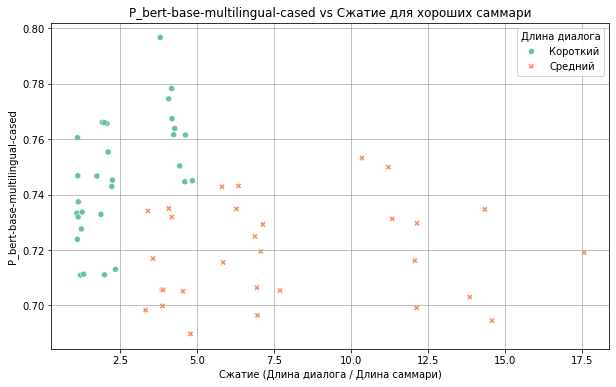

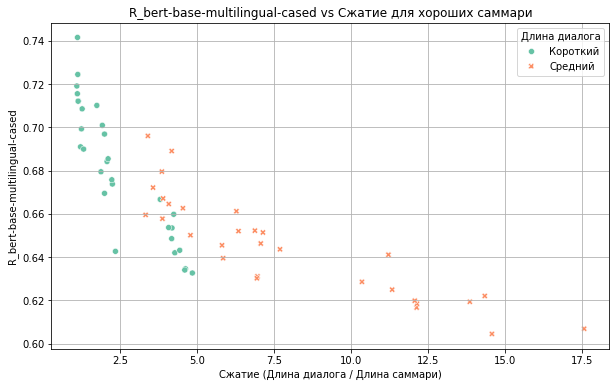

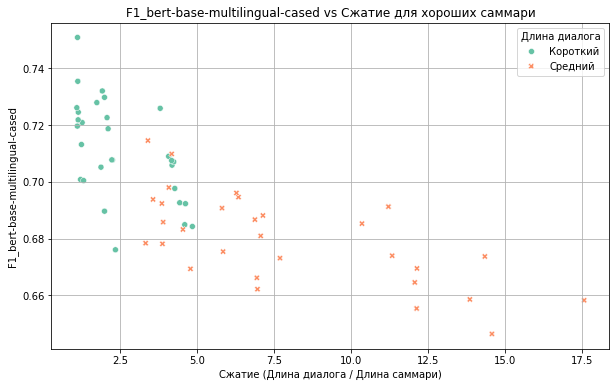

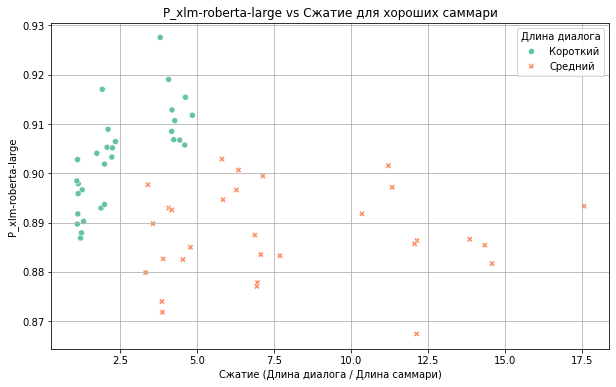

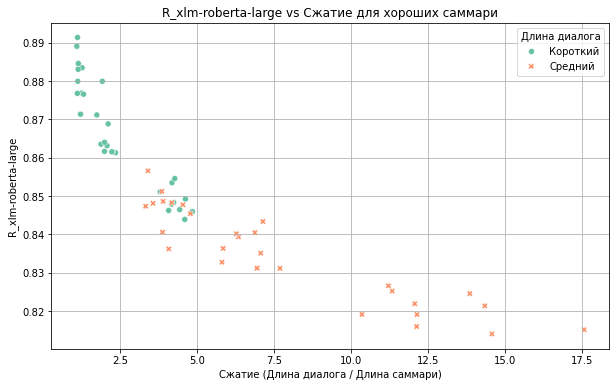

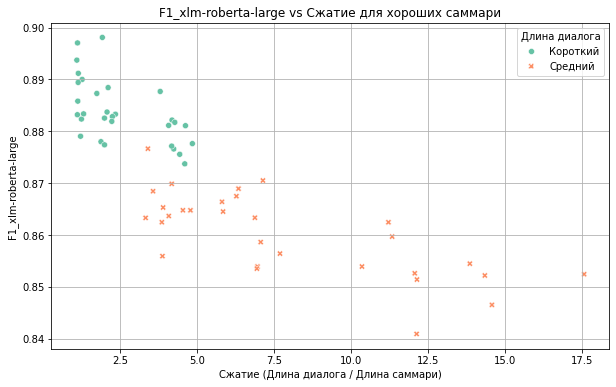

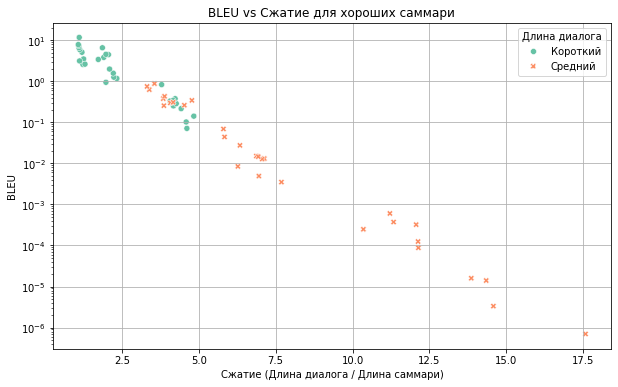

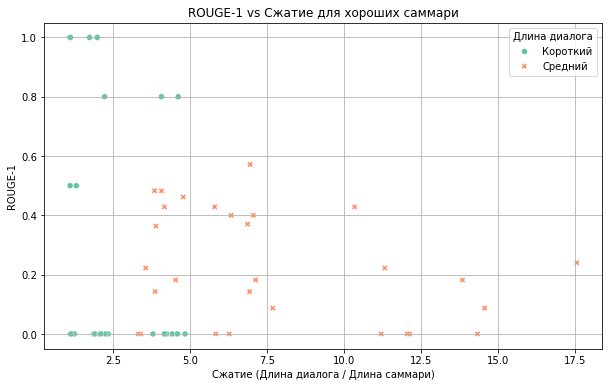

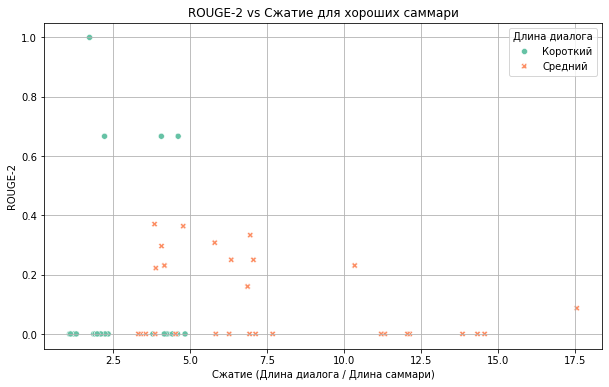

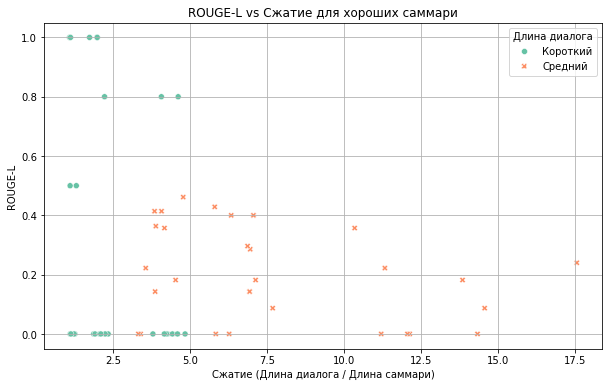

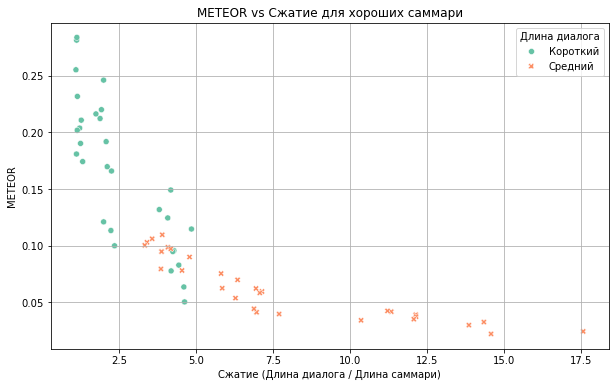

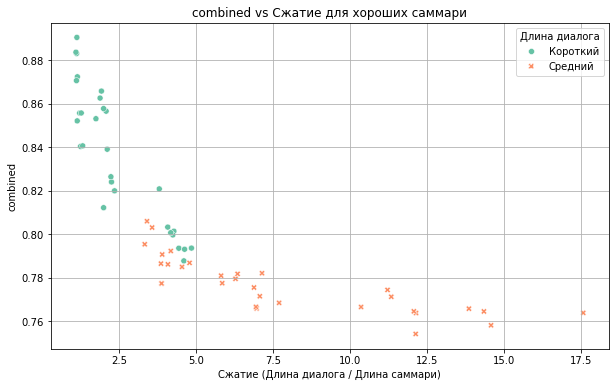

In [98]:
for metric in metrics:
    plot_metric_vs_compression(df_with_scores, metric)

На графиках просматривается связь, что чем длиннее исходый текст, тем ниже метрика. Также заметно небольшое снижение метрики с увеличением сжатия. Для более подробного анализа этой связи лучше использовать boxplot.

## Boxplot: Метрика для разных источников и качества саммари

In [99]:
# 2. Boxplot: метрика для разных источников и качества саммари
def plot_metric_by_source_and_quality(df, metric='F1'):
    """
    Построить boxplot для metric по Источнику саммари и Качеству саммари.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Источник саммари', y=metric, hue='Качество саммари', palette='Set3')
    plt.title(f"Сравнение {metric} по Источнику и Качеству саммари")
    plt.xlabel("Источник саммари")
    plt.ylabel(metric)
    plt.legend(title="Качество саммари")
    plt.grid(True)
    if metric == "BLEU":
        plt.yscale("log")
    plt.show()

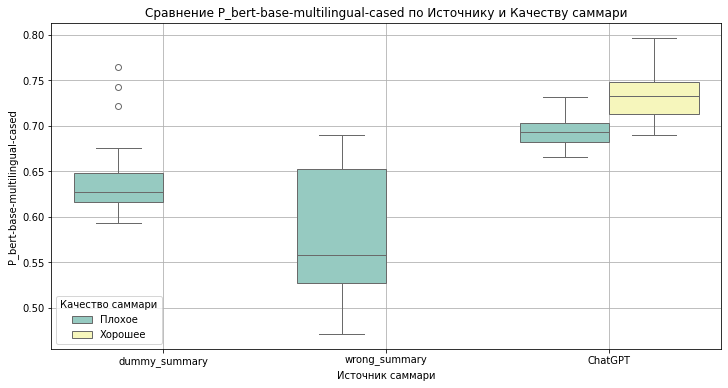

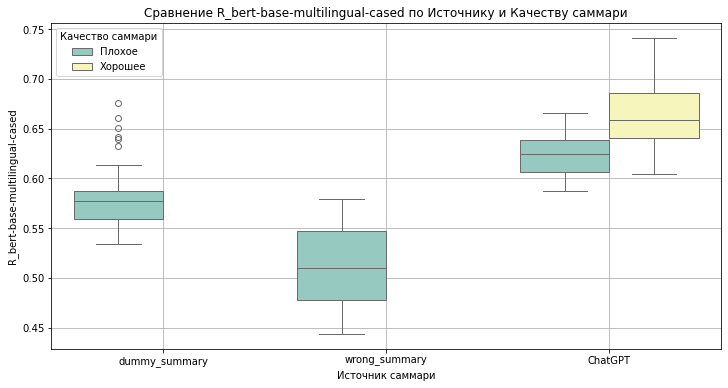

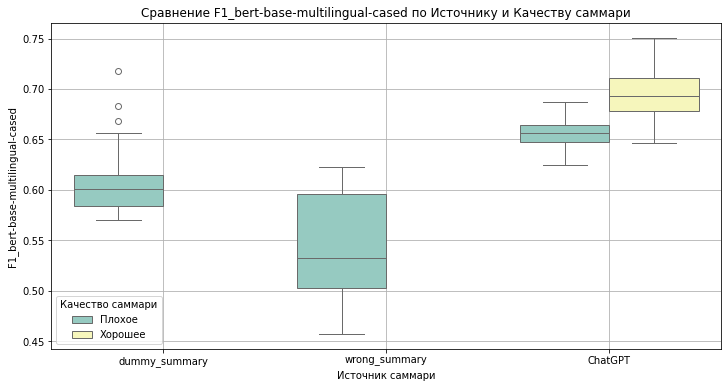

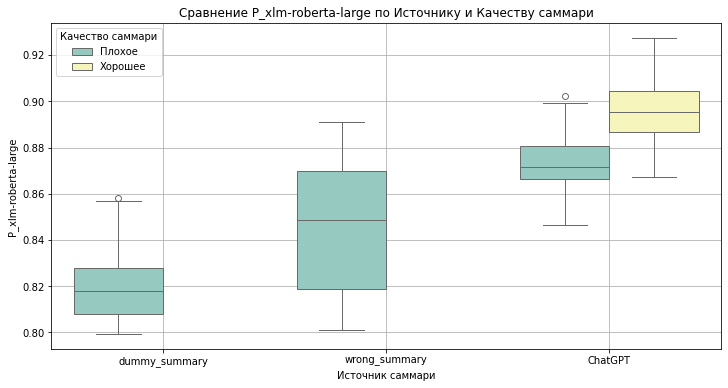

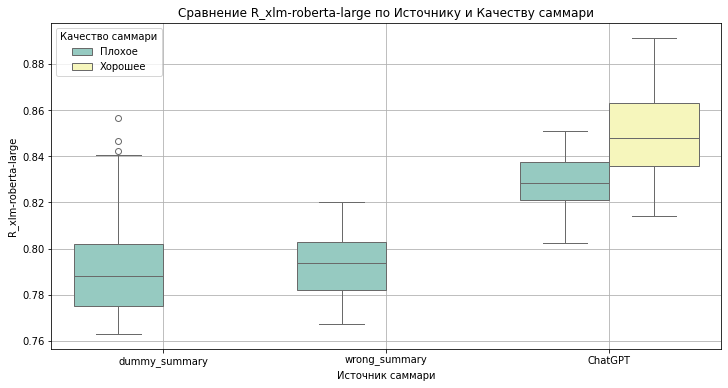

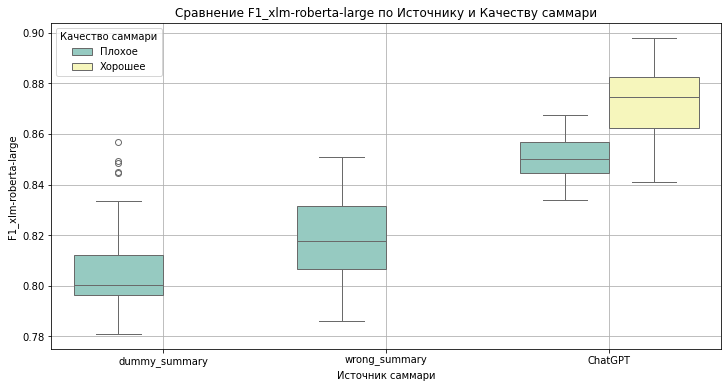

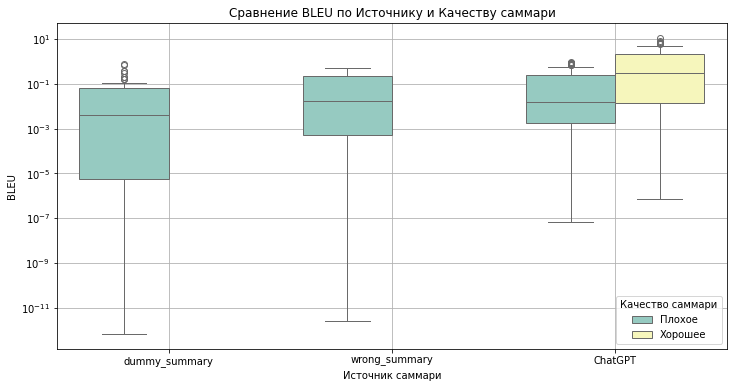

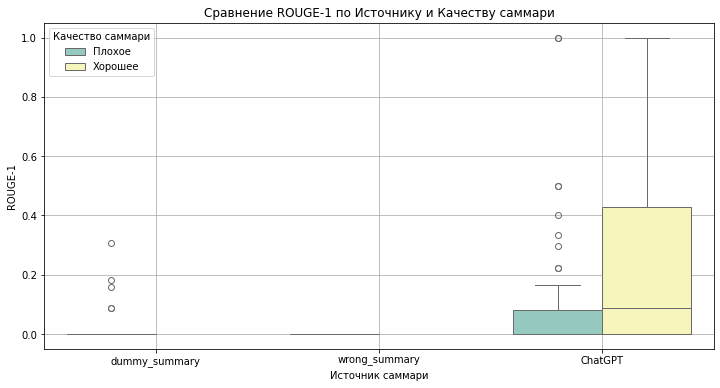

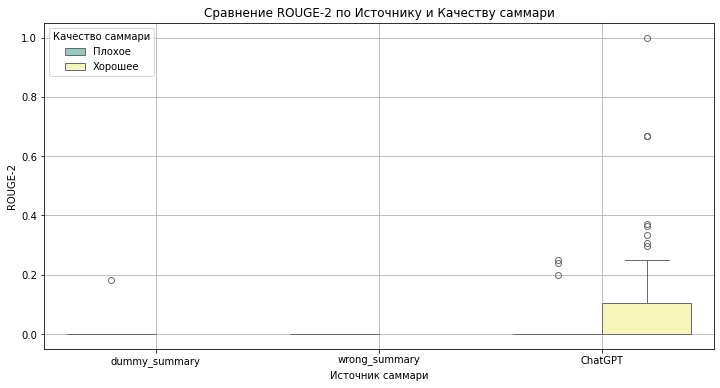

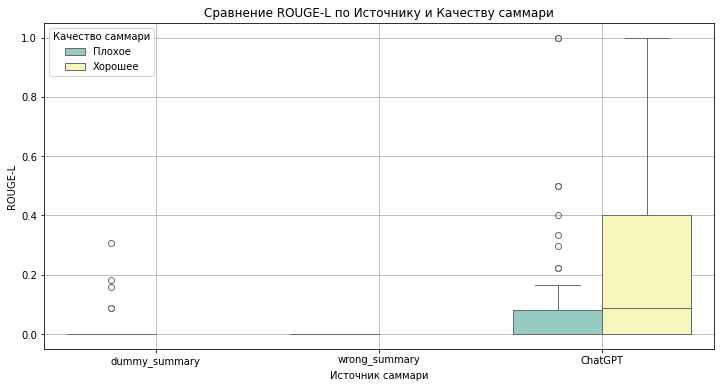

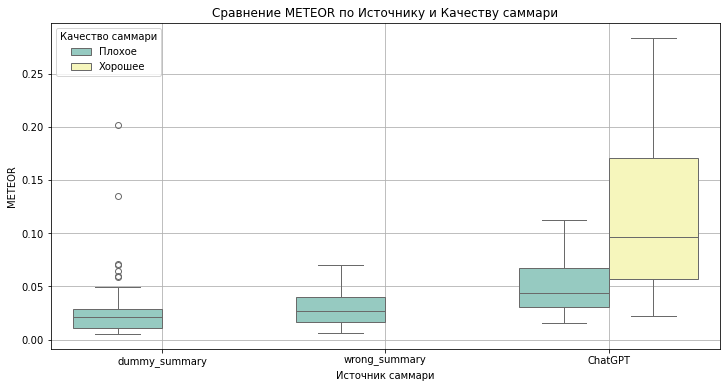

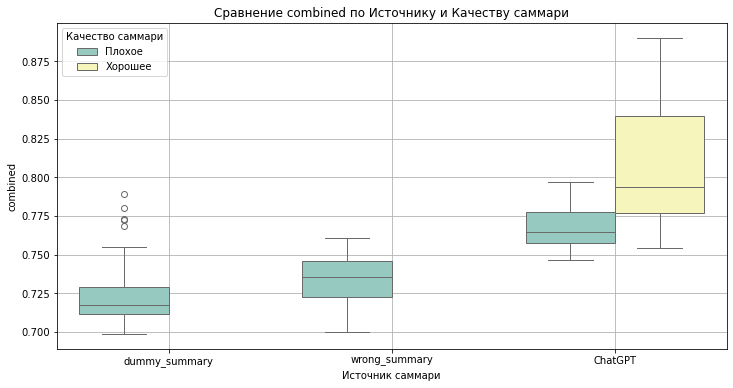

In [100]:
for metric in metrics:
    plot_metric_by_source_and_quality(df_with_scores, metric)

Все метрики показывают, что плохое саммари показывает метрику меньше, чем хорошее. Однако, плохое саммари, созданное с помощью ChatGPT, в единичных случаях неотличимо от хорошего, а иногда и превосходит его по метрике.

## Метрика vs Длина саммари (в количестве слов)

In [101]:
# 3. Scatter plot: Метрика vs Длина саммари (в количестве слов)
def plot_metric_vs_summary_length(df, metric='F1'):
    """
    Построить scatter plot для metric против Длины саммари (в словах).
    """
    filtered_df = df[df['Качество саммари'] == 'Хорошее']
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x='Количество слов в саммари', y=metric, hue='Длина диалога', style='Длина диалога', palette='Set2')
    plt.title(f"{metric} vs Длина саммари для хороших саммари")
    plt.xlabel("Количество слов в саммари")
    plt.ylabel(metric)
    plt.legend(title="Длина диалога")
    plt.grid(True)
    if metric == "BLEU":
        plt.yscale("log")
    plt.show()

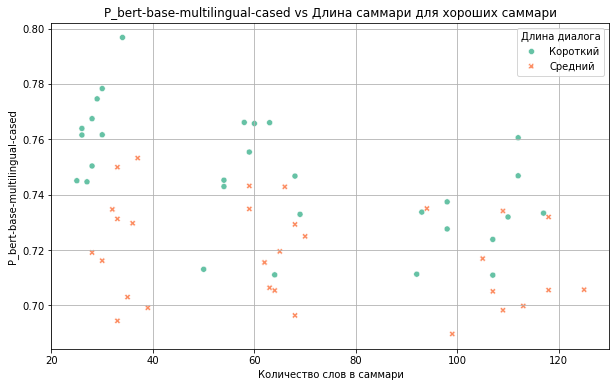

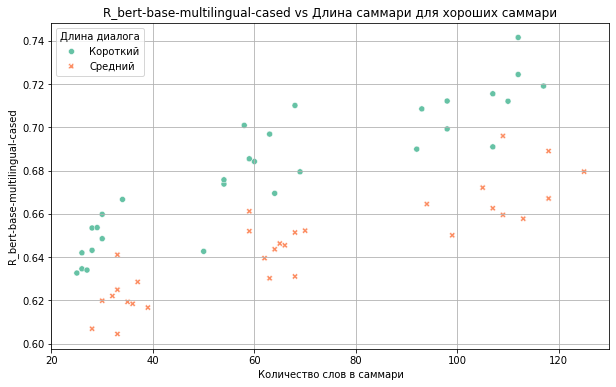

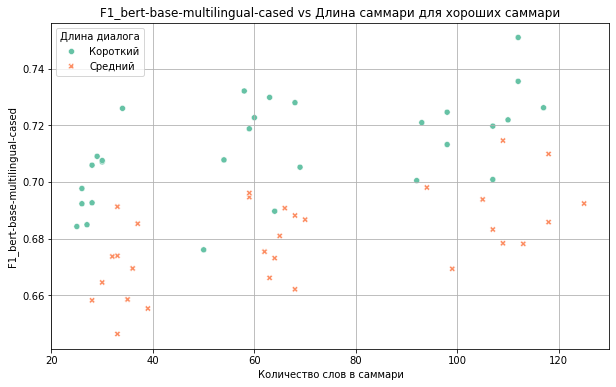

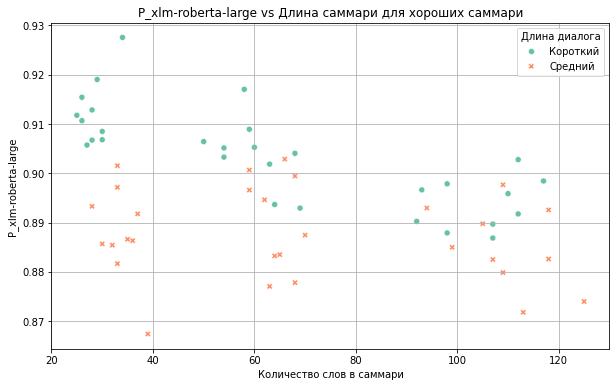

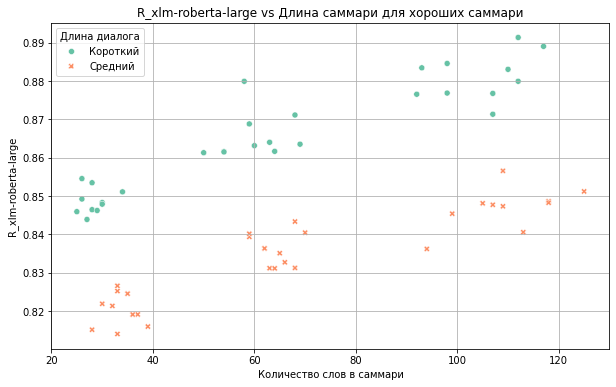

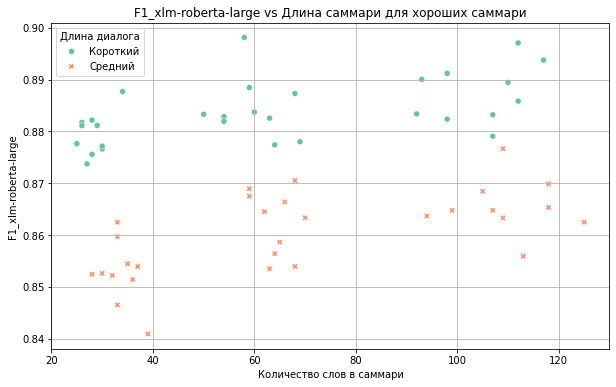

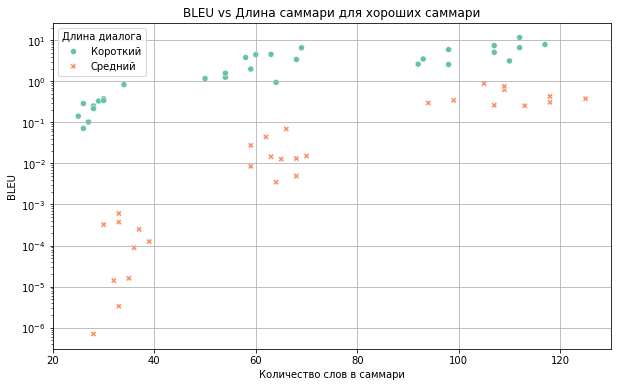

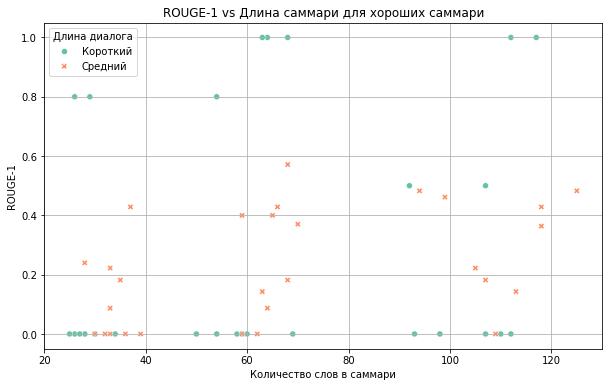

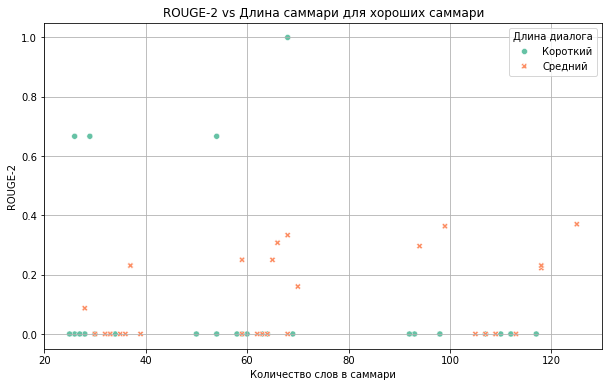

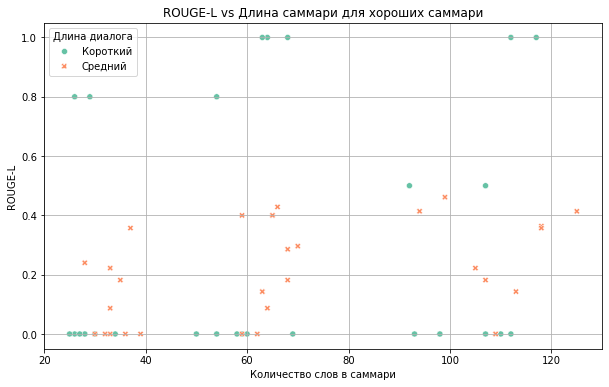

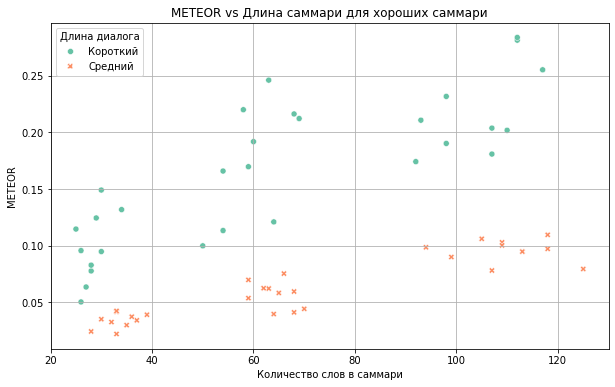

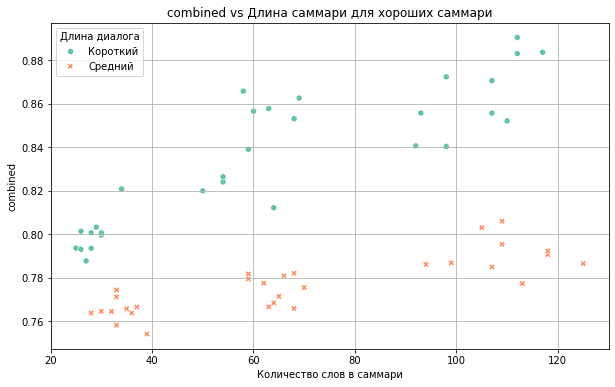

In [102]:
for metric in metrics:
    plot_metric_vs_summary_length(df_with_scores, metric)

Данные графики снова показывают, что метрика падает с увеличением длины диалога. Лучше сделать график для разной длины диалога.

## Line plot for every text

In [103]:
def plot_metric_by_text_id_with_custom_colors(df, metric="F1"):
    """
    Построить линейный график метрики `metric` для различных text_id,
    с уникальными цветами для комбинаций Источник саммари + Качество саммари
    и разными маркерами для длины саммари.
    """
    plt.figure(figsize=(14, 8))
    
    # Уникальные комбинации "Источник саммари" и "Качество саммари"
    unique_combinations = df[['Источник саммари', 'Качество саммари', 'Длина саммари']].drop_duplicates()
    
    # Задаем цвета для комбинаций
    color_palette = sns.color_palette("tab10", 4)  # 4 цвета
    unique_categories = df[['Источник саммари', 'Качество саммари']].drop_duplicates()
    category_colors = dict(zip(
        unique_categories.apply(lambda x: f"{x['Источник саммари']} - {x['Качество саммари']}", axis=1),
        color_palette
    ))
    
    # Маркеры для длины саммари
    marker_map = {
        'Короткое': 'o',    # Кружок
        'Среднее': 'x',     # Крестик
        'Длинное': '^'      # Треугольник
    }
    
    # Строим линии для каждой комбинации
    for _, row in unique_combinations.iterrows():
        source = row['Источник саммари']
        quality = row['Качество саммари']
        length = row['Длина саммари']
        
        # Уникальная категория
        category = f"{source} - {quality}"
        
        # Фильтруем данные для текущей комбинации
        subset = df[
            (df['Источник саммари'] == source) & 
            (df['Качество саммари'] == quality) & 
            (df['Длина саммари'] == length)
        ]
        subset = subset.sort_values('text_id')  # Сортируем по text_id для линии
        
        # Строим линию
        plt.plot(
            subset['text_id'], subset[metric],
            label=f"{category} ({length})",
            marker=marker_map[length],
            linestyle='-', linewidth=2,
            color=category_colors[category]  # Цвет для комбинации
        )
    
    # Настройки графика
    plt.title(f"{metric} для различных text_id (по источнику и качеству саммари)", fontsize=16)
    plt.xlabel("text_id", fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.legend(title="Источник, Качество и Длина саммари", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.xticks(df['text_id'].unique())  # Обозначаем text_id на оси X
    plt.tight_layout()  # Чтобы легенда не накладывалась
    if metric == "BLEU":
        plt.yscale("log")
    plt.show()

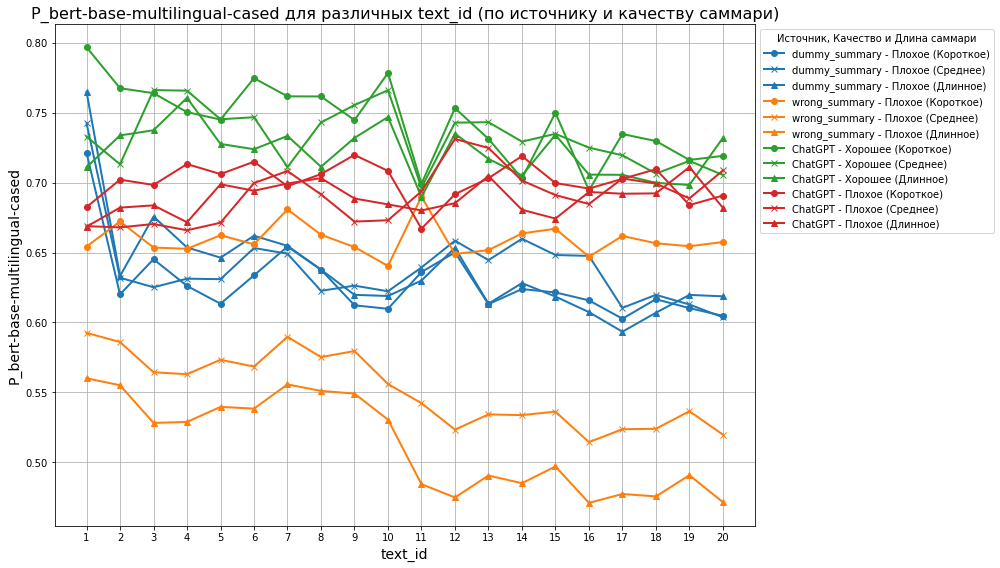

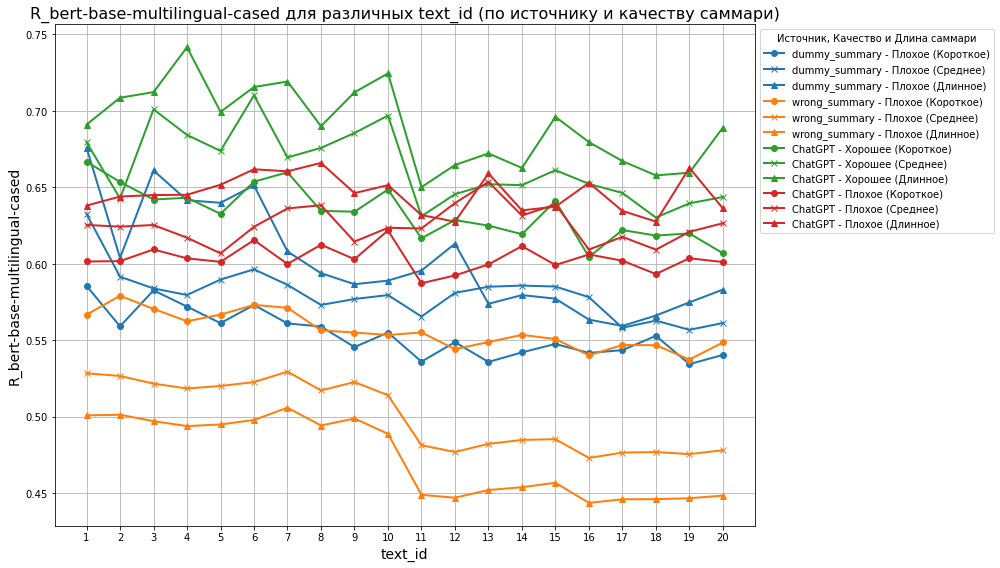

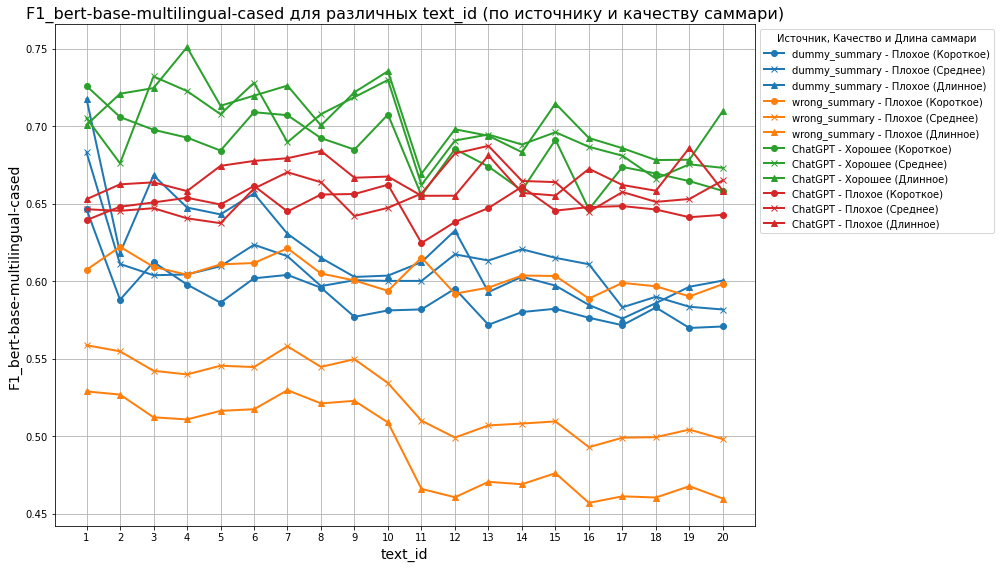

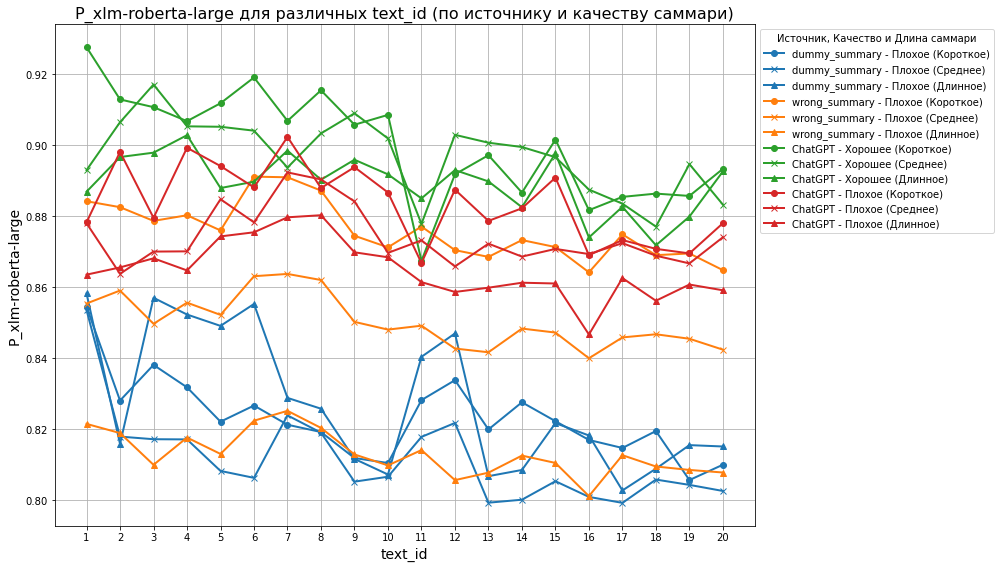

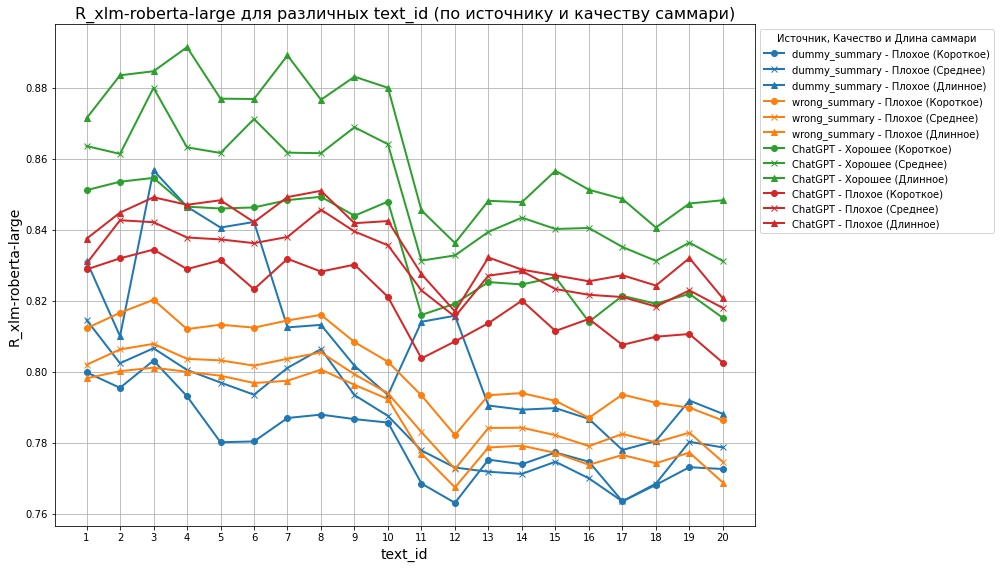

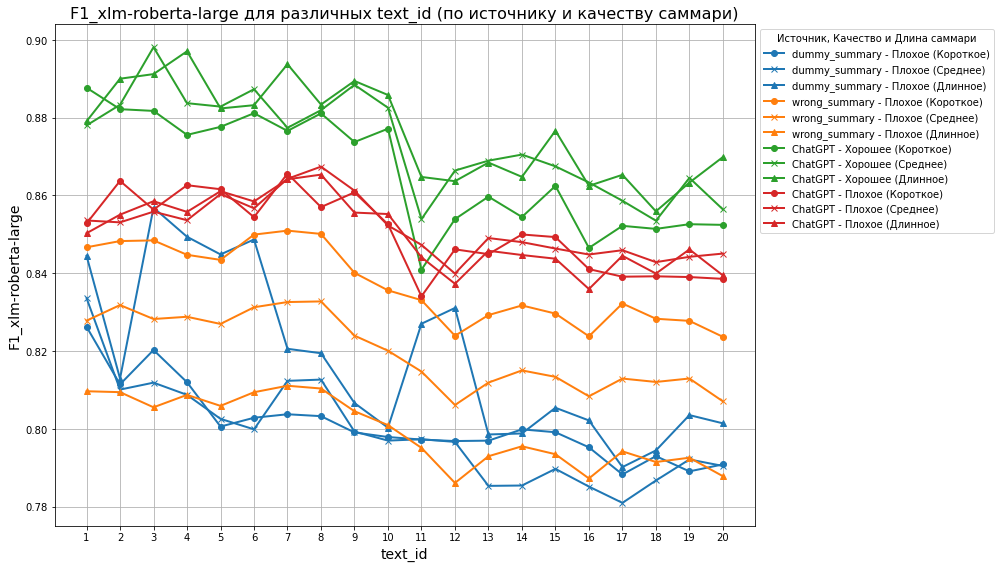

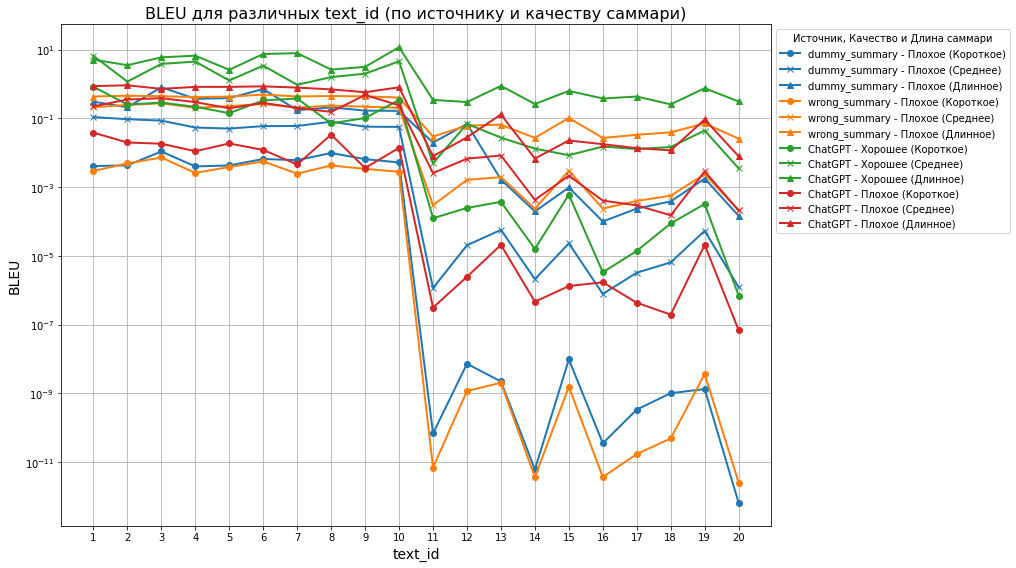

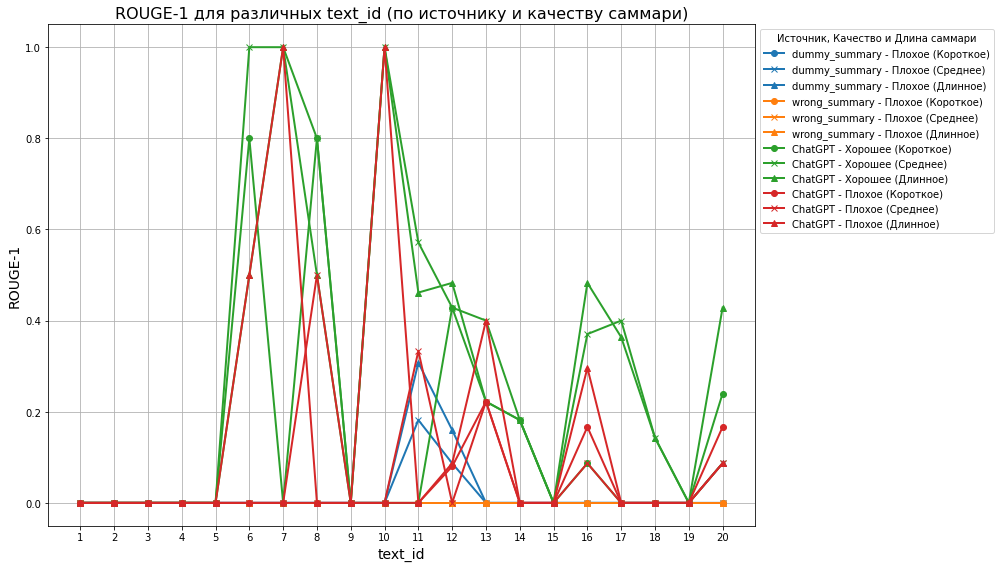

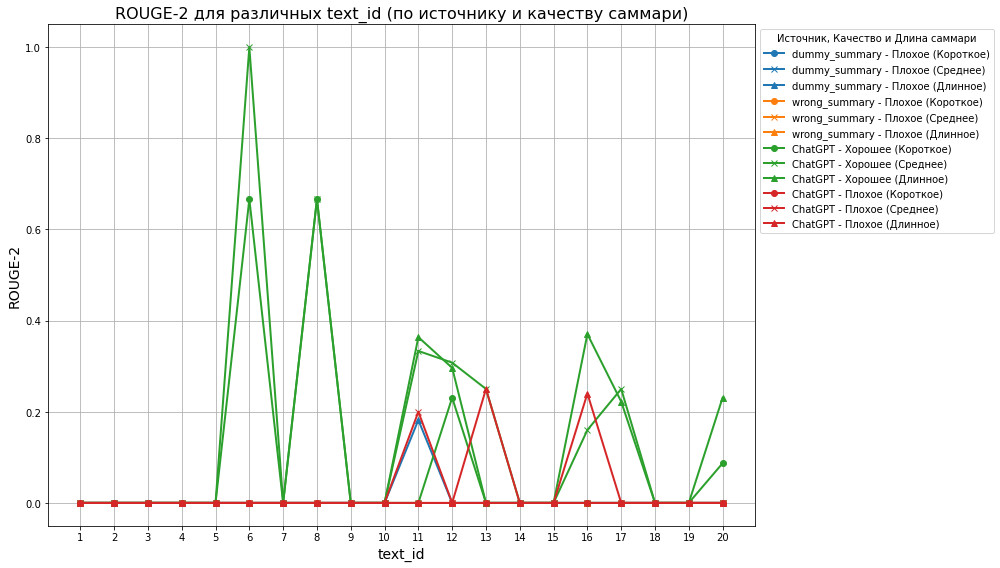

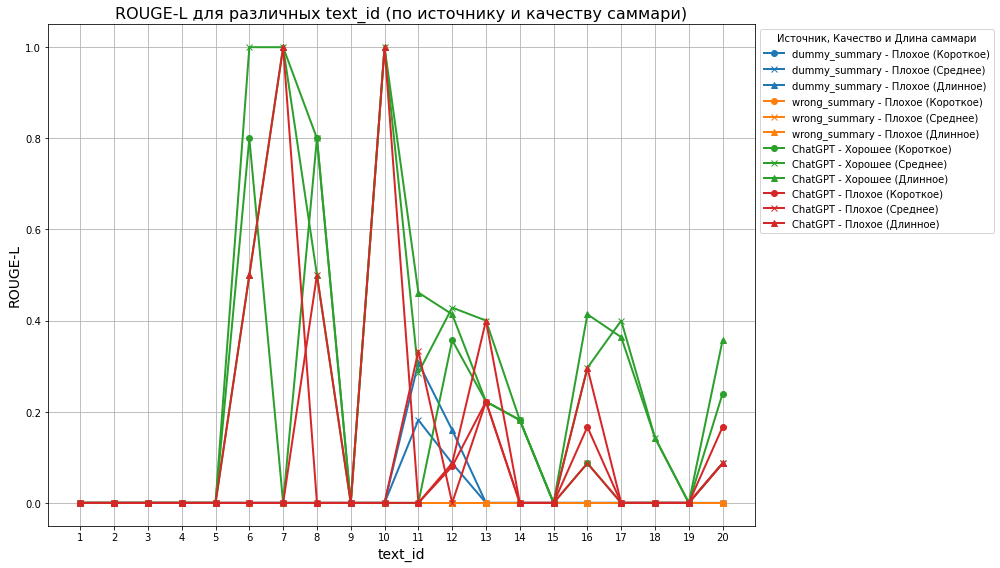

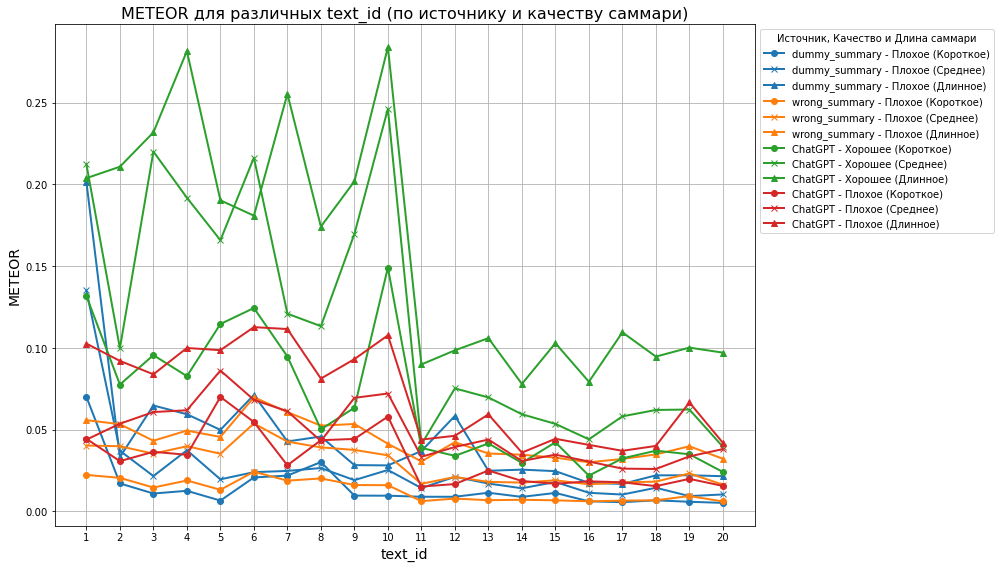

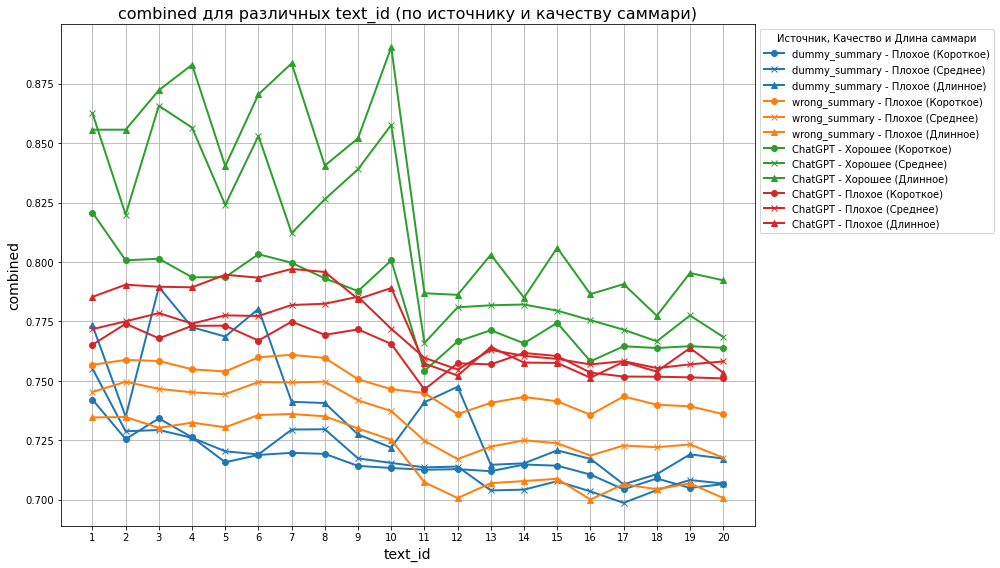

In [104]:
for metric in metrics:
    plot_metric_by_text_id_with_custom_colors(df_with_scores, metric)

По графику хорошо видно, что для большинства текстов саммари хорошего качества превосходит по метрике плохое саммари. При этом бывают случаи, когда
- Плохое длинное саммари получило скор выше, чем хорошее длинное (текст 1, 19)
- Хорошее короткое и плохое короткое саммари от ChatGPT имеет схожий скор (текст 14, 16)

## Метрика в разрезе источника и качества для разных длин саммари

In [105]:
# 4 . Boxplot: F1 для разных источников и качества саммари, для всех длин саммари
def plot_metric_by_source_and_quality(df, metric='F1'):
    """
    Построить boxplot для metric по Источнику саммари и Качеству саммари.
    """
    for summary_length in ['Короткое','Среднее','Длинное']:
        df1 = df[df["Длина саммари"] == summary_length]
        print(f"{summary_length} саммари")
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df1, x='Источник саммари', y=metric, hue='Качество саммари', palette='Set3')
        plt.title(f"Сравнение {metric} по Источнику и Качеству саммари")
        plt.xlabel("Источник саммари")
        plt.ylabel(metric)
        plt.legend(title="Качество саммари")
        plt.grid(True)
        if metric == "BLEU":
            plt.yscale("log")
        plt.show()

Короткое саммари


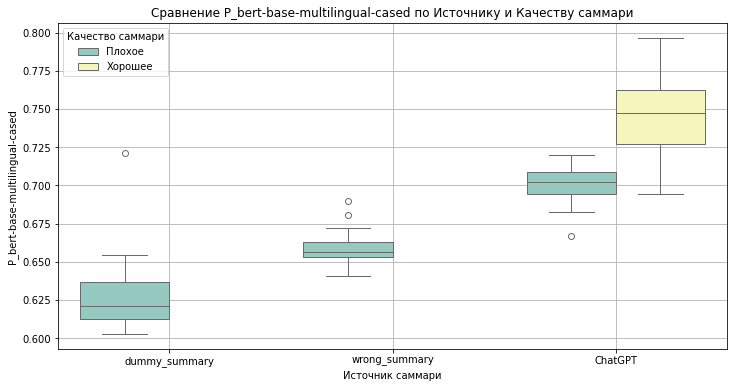

Среднее саммари


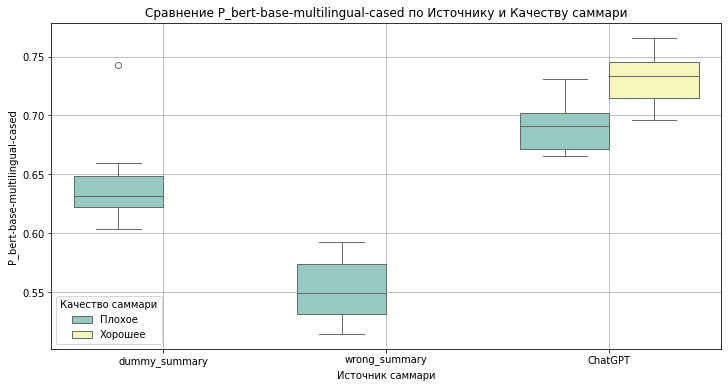

Длинное саммари


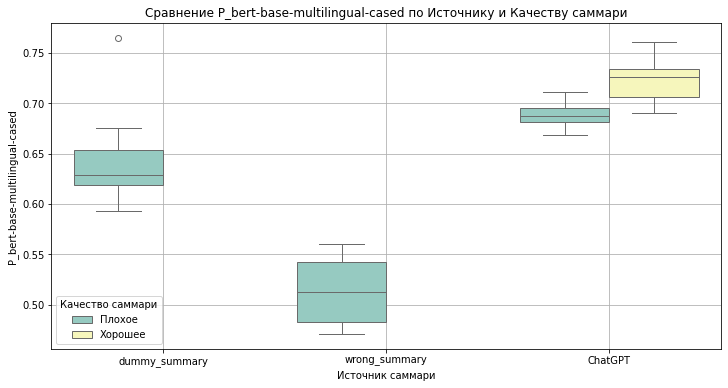

Короткое саммари


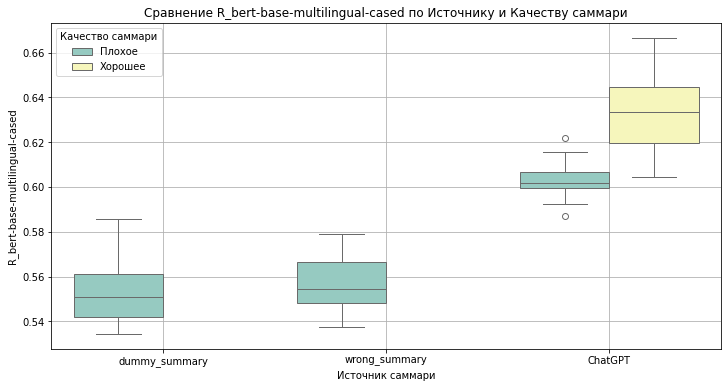

Среднее саммари


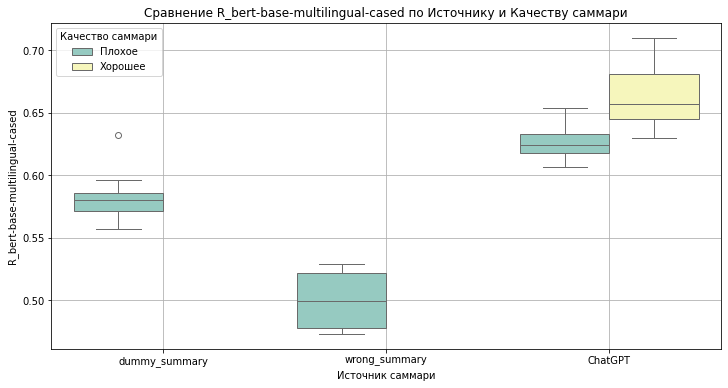

Длинное саммари


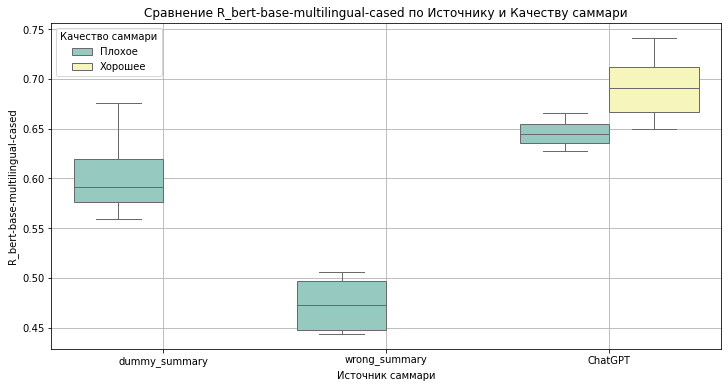

Короткое саммари


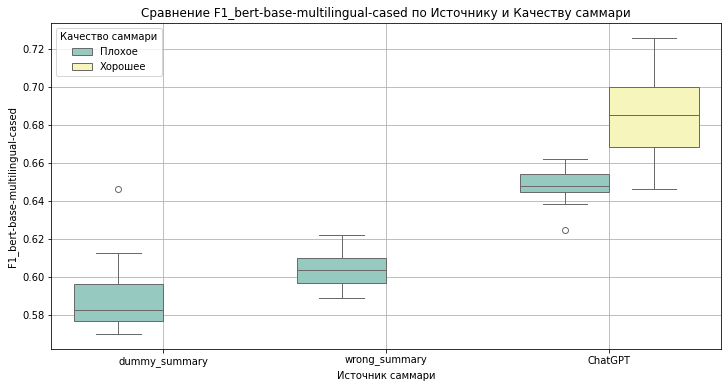

Среднее саммари


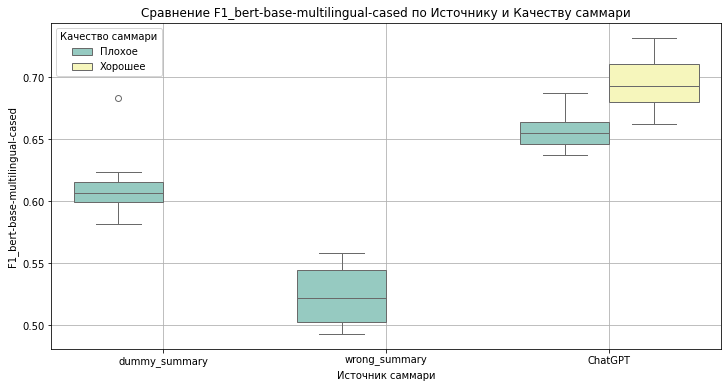

Длинное саммари


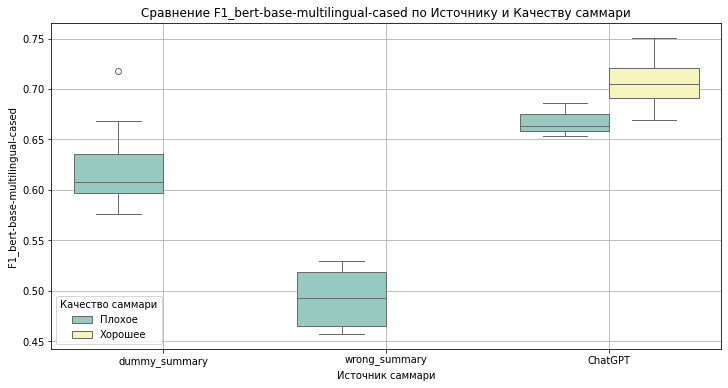

Короткое саммари


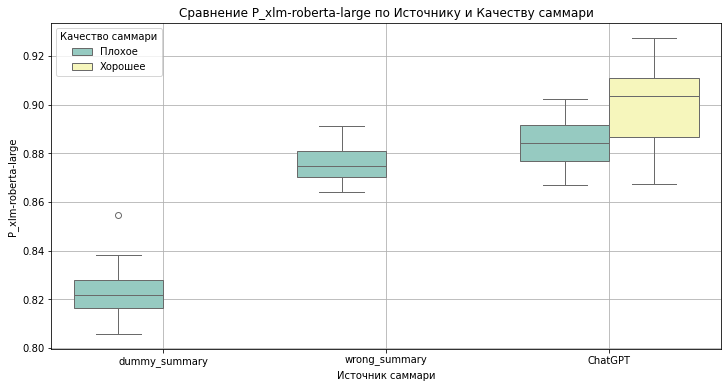

Среднее саммари


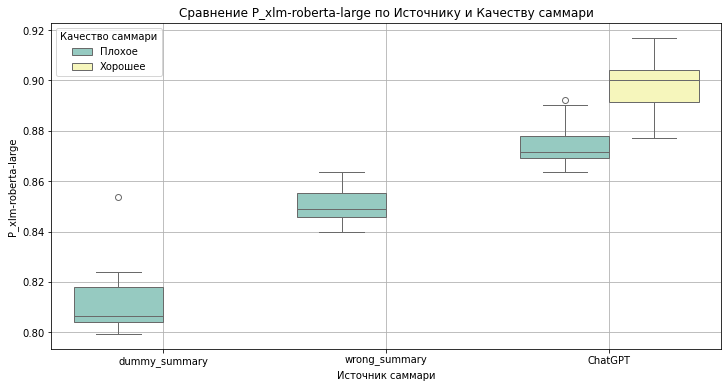

Длинное саммари


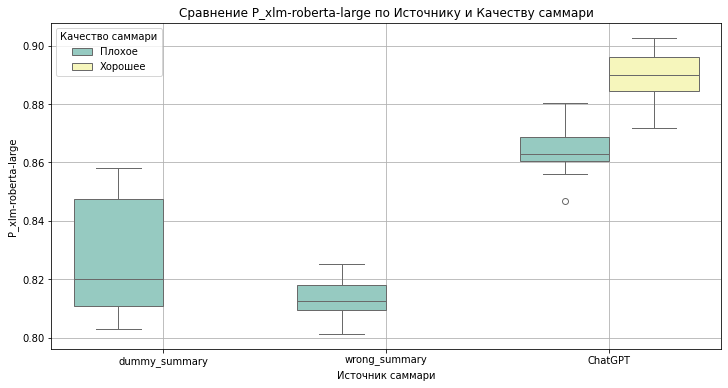

Короткое саммари


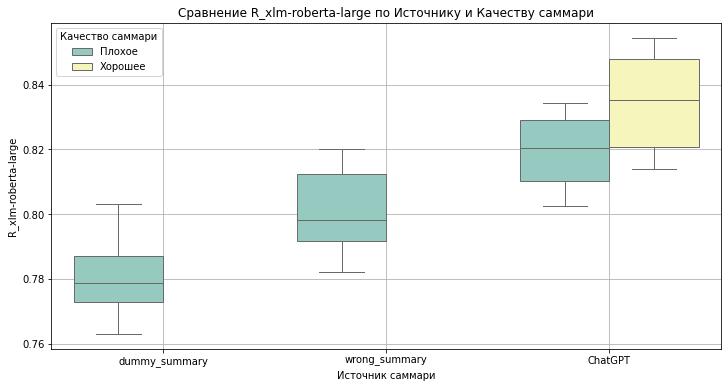

Среднее саммари


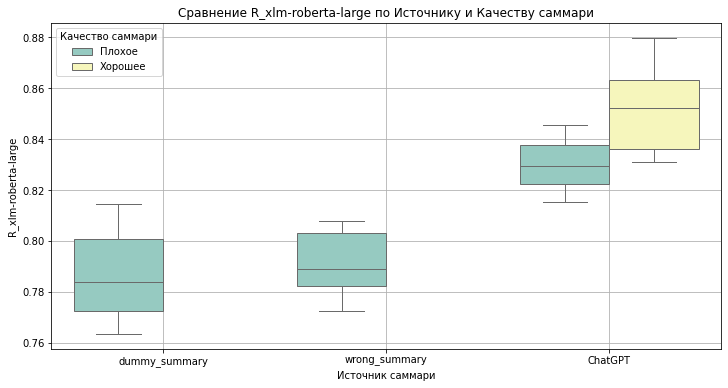

Длинное саммари


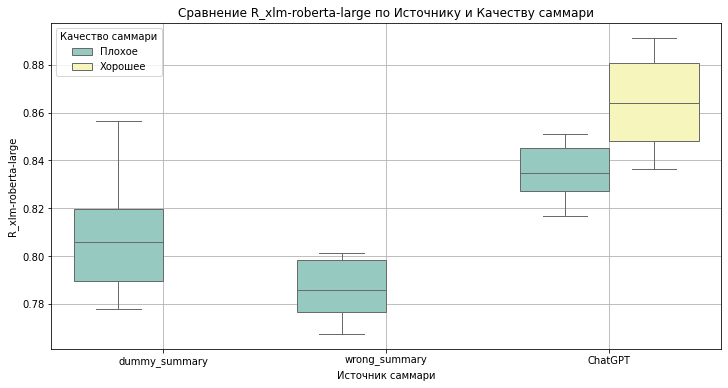

Короткое саммари


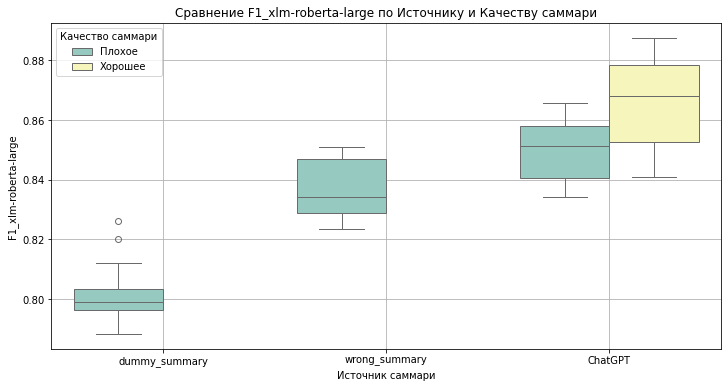

Среднее саммари


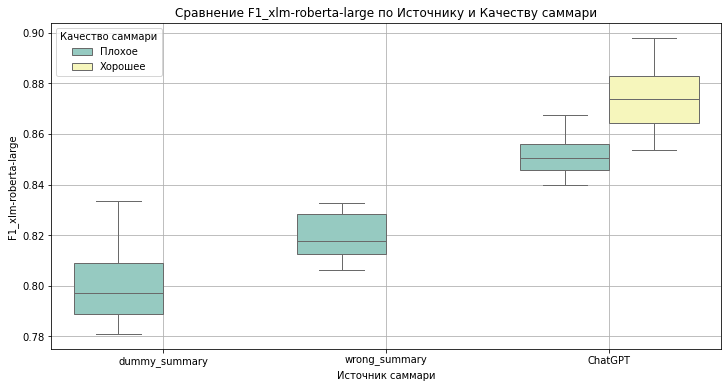

Длинное саммари


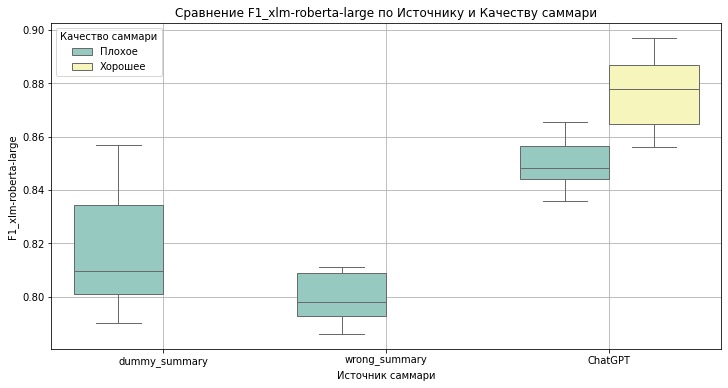

Короткое саммари


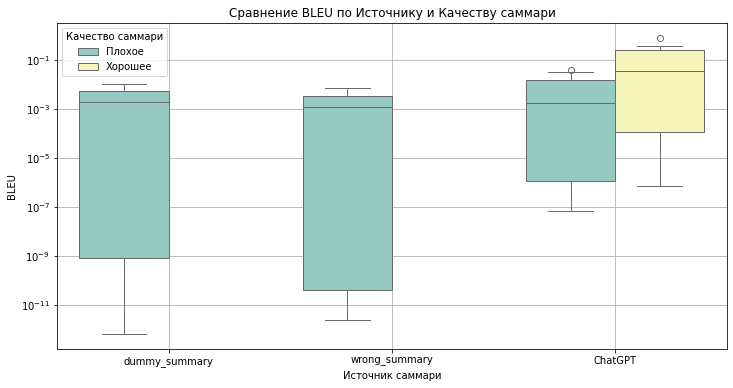

Среднее саммари


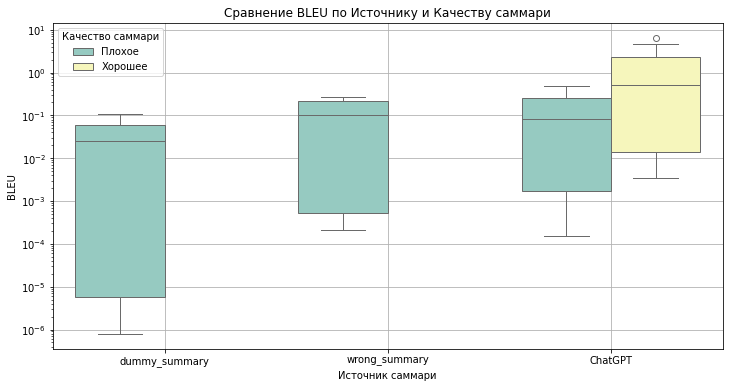

Длинное саммари


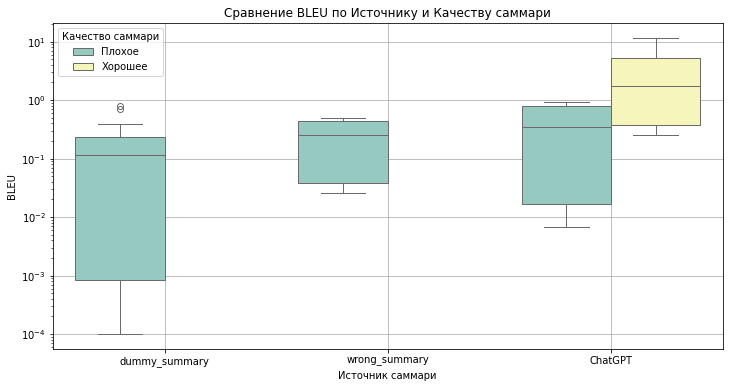

Короткое саммари


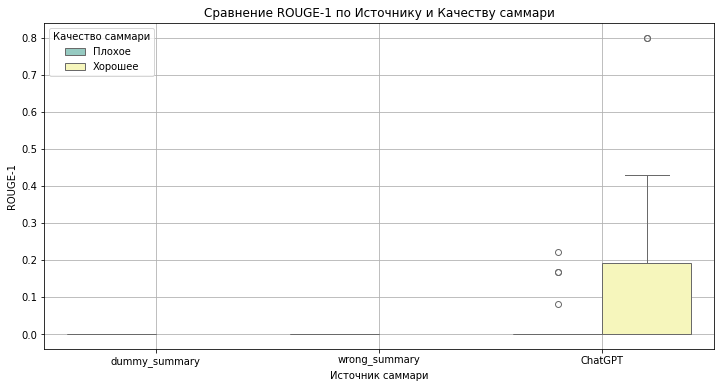

Среднее саммари


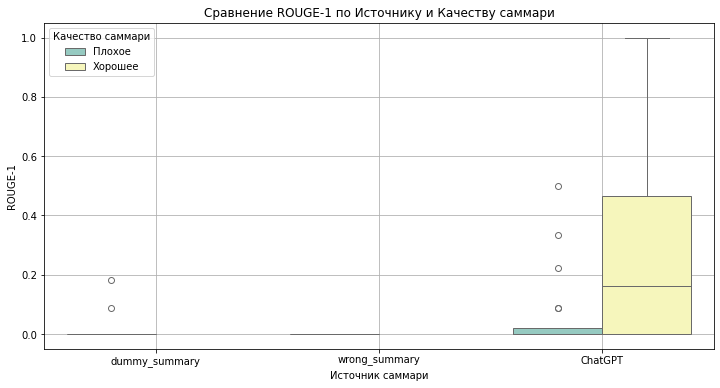

Длинное саммари


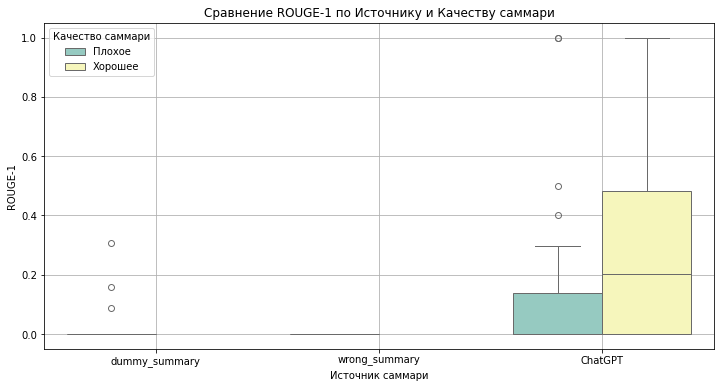

Короткое саммари


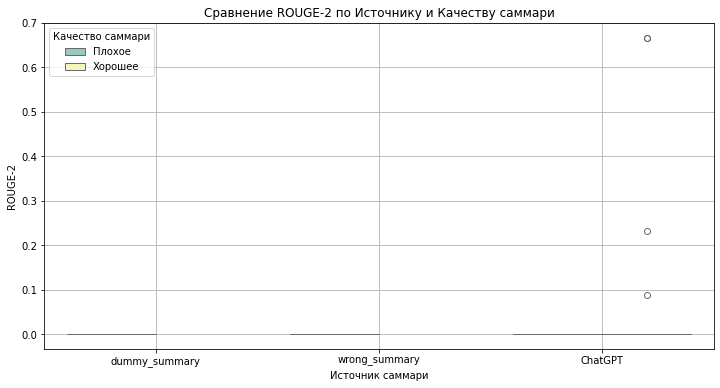

Среднее саммари


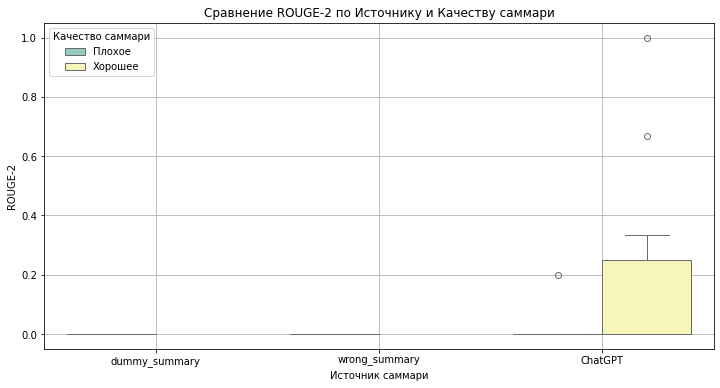

Длинное саммари


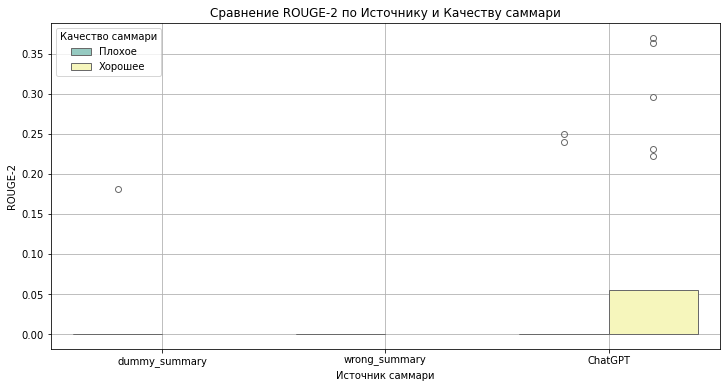

Короткое саммари


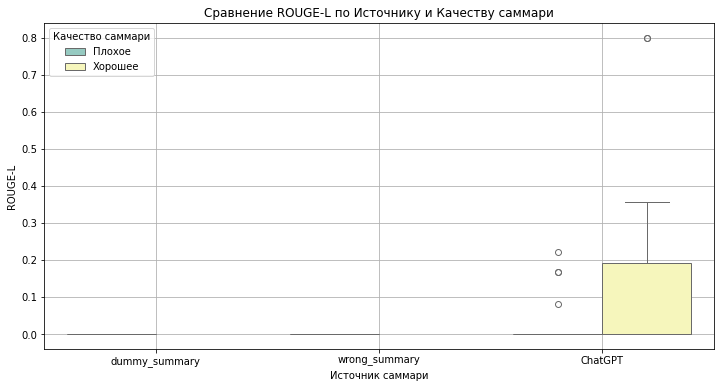

Среднее саммари


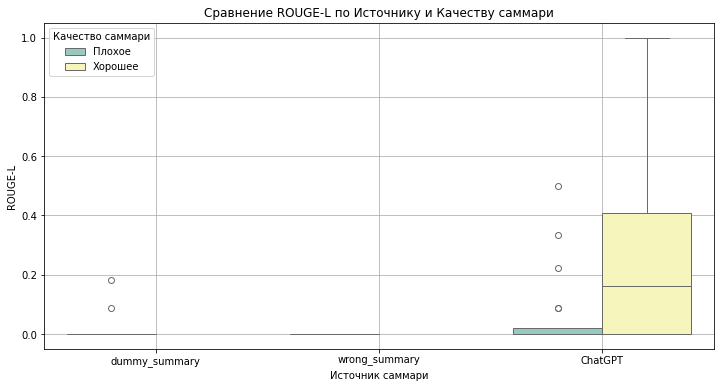

Длинное саммари


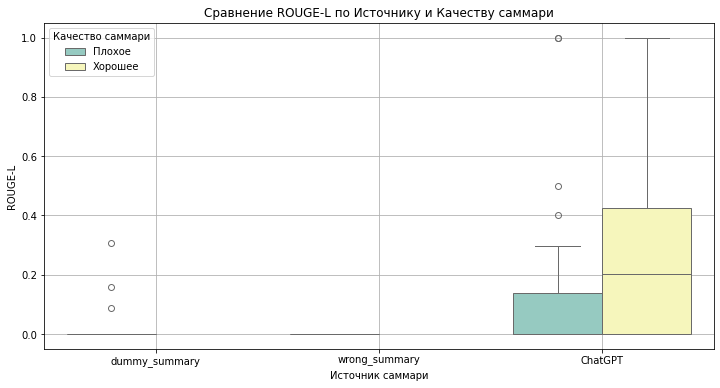

Короткое саммари


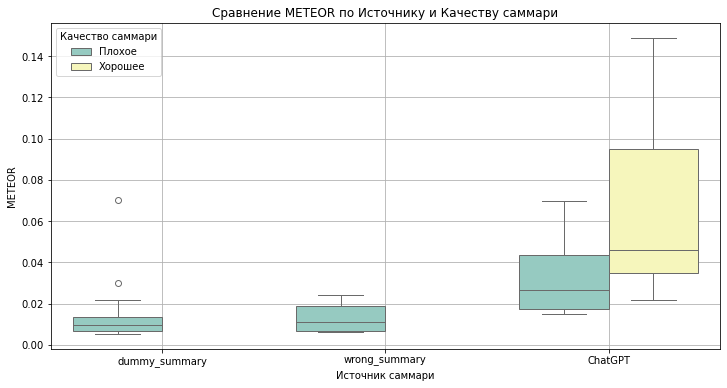

Среднее саммари


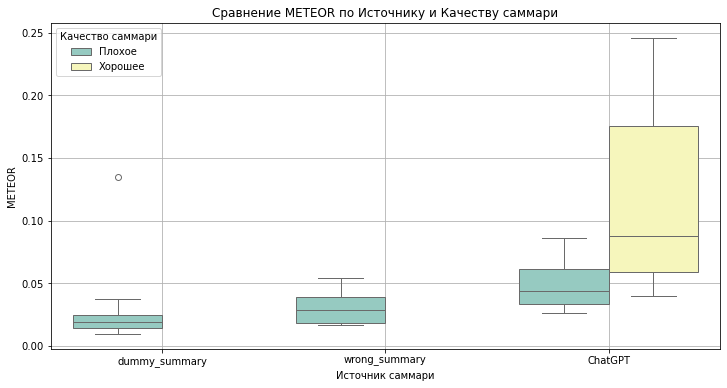

Длинное саммари


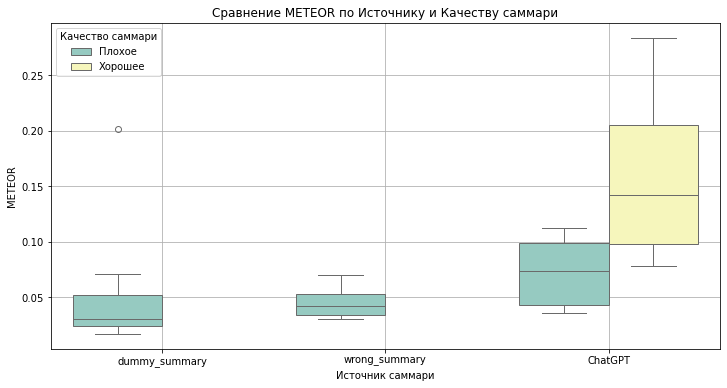

Короткое саммари


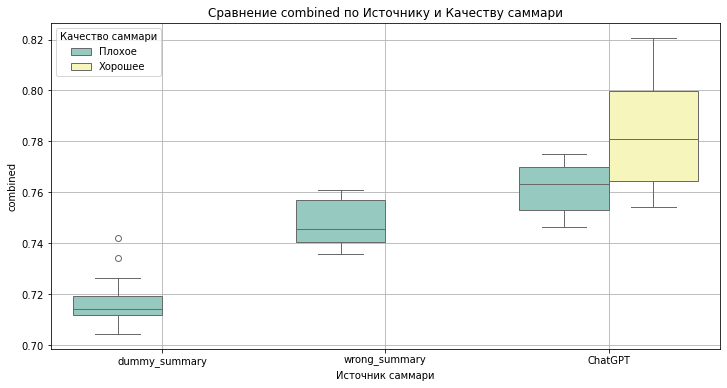

Среднее саммари


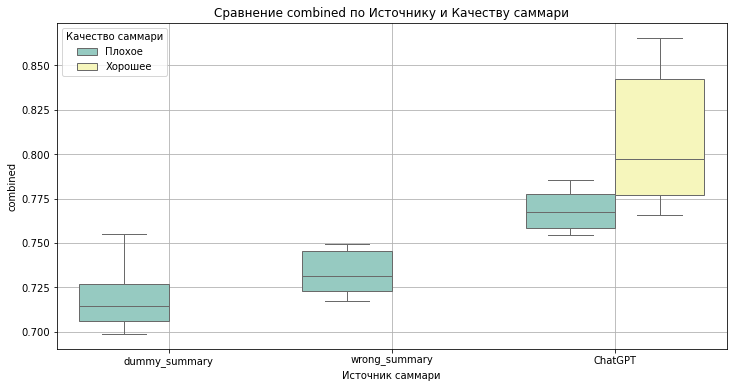

Длинное саммари


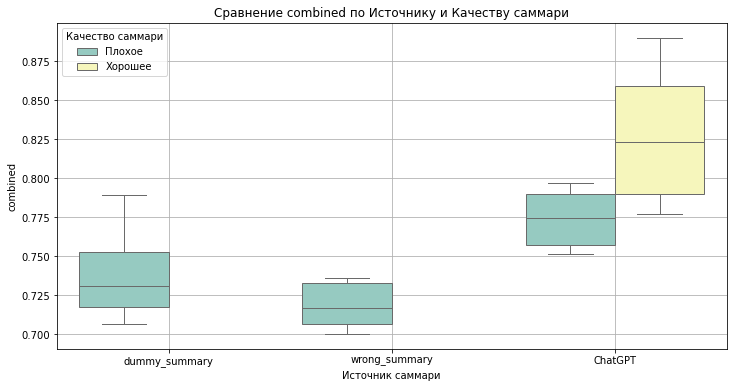

In [106]:
for metric in metrics:
    plot_metric_by_source_and_quality(df_with_scores, metric)

Графики подтверждают выводы из первой картинки, что плохое саммари в основном показывает метрику меньше, чем хорошее, для всех длин саммари. При этом видно, что короткое и длинное саммари проще отличить по метрике, чем среднее.